<a href="https://colab.research.google.com/github/Anu-jo/week3/blob/main/data_over_sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import imblearn
import sklearn
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from imblearn.over_sampling import SMOTE
#import category_encoders as ce
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
df=pd.read_csv('Dry_Bean_Dataset.csv')
#data encoding
from sklearn.preprocessing import OneHotEncoder
oe_style = OneHotEncoder()
oe_results = oe_style.fit_transform(df[["Class"]])
pd.DataFrame(oe_results.toarray(), columns=oe_style.categories_).head()
df = df.join(pd.DataFrame(oe_results.toarray(), columns=oe_style.categories_))
y = df['Class']#dependent variable
X = df.drop(['Class'], axis = 1)#independent variable
#over sampling
ros = RandomOverSampler(random_state=42)
# fit predictor and target variable
x_ros, y_ros = ros.fit_resample(X, y)
print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_ros))
#data standardization
from sklearn.preprocessing import StandardScaler
object= StandardScaler()
 # standardization
X_std = object.fit_transform(x_ros)
print(X_std)


Original dataset shape Counter({'DERMASON': 3546, 'SIRA': 2636, 'SEKER': 2027, 'HOROZ': 1928, 'CALI': 1630, 'BARBUNYA': 1322, 'BOMBAY': 522})
Resample dataset shape Counter({'SEKER': 3546, 'BARBUNYA': 3546, 'BOMBAY': 3546, 'CALI': 3546, 'HOROZ': 3546, 'SIRA': 3546, 'DERMASON': 3546})
[[-0.90014718 -1.21755861 -1.34951635 ... -0.40824829  2.44948974
  -0.40824829]
 [-0.89281612 -1.12426241 -1.41600032 ... -0.40824829  2.44948974
  -0.40824829]
 [-0.87884601 -1.17106025 -1.30913932 ... -0.40824829  2.44948974
  -0.40824829]
 ...
 [-0.55379225 -0.62976596 -0.59098978 ... -0.40824829 -0.40824829
   2.44948974]
 [-0.64565762 -0.67306439 -0.5451123  ... -0.40824829 -0.40824829
   2.44948974]
 [-0.49769556 -0.50762657 -0.46097801 ... -0.40824829 -0.40824829
   2.44948974]]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


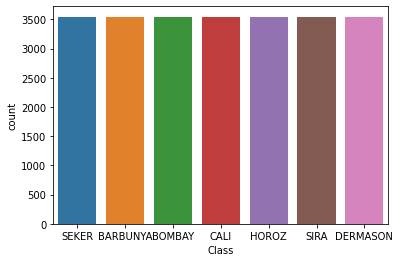

In [ ]:
g = sns.countplot(df['Class'])
g_os = sns.countplot(y_ros)
g.set_xticklabels(['SEKER','BARBUNYA','BOMBAY','CALI','HOROZ','SIRA','DERMASON'])
plt.show()

[ 41.34655229  66.0156344   73.40252796  79.33441267  84.72392348
  89.87361978  94.2998766   97.37685029  98.31349502  99.09554594
  99.45448147  99.69495754  99.87020597  99.96319251  99.99187089
  99.99622277  99.99859925  99.99941297  99.99993945  99.99998514
  99.99999304 100.         100.        ]


Text(0, 0.5, 'Cumulative Explained variance(%)')

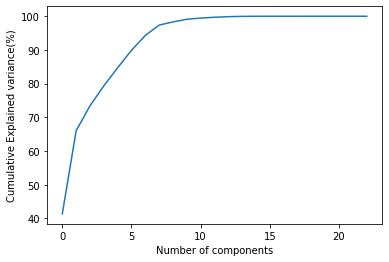

In [ ]:
#dimensionality reduction using PCA
from sklearn.model_selection import train_test_split# model for splitting the data
# we split 80% of the data for model training and 30% accuracy model testing
XTrain, XTest, YTrain, YTest = train_test_split(X_std, y_ros, test_size = 0.3, random_state = 100)
#PCA calculation
pca=PCA()
XTrain_pca=pca.fit_transform(XTrain)
XTest_pca=pca.transform(XTest)
#print(pca.explained_variance_ratio_*100)
cum_sum_pca=np.cumsum(pca.explained_variance_ratio_*100)
print(cum_sum_pca)
plt.plot(np.cumsum(pca.explained_variance_ratio_*100))
plt.xlabel('Number of components')
plt.ylabel('Cumulative Explained variance(%)')


[ 41.34655229  66.0156344   73.40252796  79.33441267  84.72392348
  89.87361978  94.2998766   97.37685029  98.31349502  99.09554594
  99.45448147  99.69495754  99.87020597  99.96319251  99.99187089
  99.99622277  99.99859925  99.99941297  99.99993945  99.99998514
  99.99999304 100.        ]


Text(0, 0.5, 'Cumulative Kernel pca Explained variance(%)')

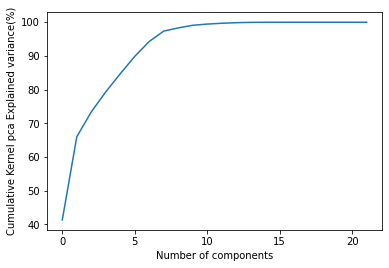

In [ ]:
# Import the Kernel PCA class
from sklearn.decomposition import KernelPCA
# initialize the Kernel PCA object
Kernel_pca = KernelPCA()# finding the kernel pca value
# transform and fit the feature of the training set
XTrain_kernel = Kernel_pca.fit_transform(XTrain)
# transform features of the test set
XTest_kernel = Kernel_pca.transform(XTest)
ex_var=np.var(XTrain_kernel,axis=0)
explained_variance=ex_var/np.sum(ex_var)
print(np.cumsum(explained_variance*100))
plt.plot(np.cumsum(explained_variance*100))
plt.xlabel('Number of components')
plt.ylabel('Cumulative Kernel pca Explained variance(%)')

In [ ]:
#taking 95% of varaiance contributed components
pca_95=PCA(n_components=0.95)
X_pca_95=pca_95.fit_transform(X_std)
print(X_pca_95.shape)
#creating new dataset that is dimensionally reduced
df_new=pd.DataFrame(X_pca_95,columns=['PC1','PC2','PC3','PC4'])
df_new['Class']=y
print(df_new.head())
df_new.to_csv('Drybeans_95.csv',index=False)


In [ ]:
from sklearn.naive_bayes import GaussianNB

#Calling the Class
naive_bayes = GaussianNB()

#Fitting the data to the classifier
naive_bayes.fit(XTrain , YTrain)

#Predict on test data
y_predicted = naive_bayes.predict(XTest)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,plot_confusion_matrix
print('Accuracy score:')
accuracy_score=accuracy_score(y_predicted , YTest)
accuracy_score
#cm=confusion_matrix(y_test, y_predicted)
plot_confusion_matrix(naive_bayes,YTest,y_predicted)


In [ ]:
#decision tree classifier
from sklearn.tree import DecisionTreeClassifier
clf_model = DecisionTreeClassifier(criterion="gini", random_state=42,max_depth=3, min_samples_leaf=7)
clf_model.fit(XTrain,YTrain)
y_predict = clf_model.predict(XTest)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,plot_confusion_matrix
accuracy_score(YTest,y_predict)
plot_confusion_matrix(clf_model,YTest,y_predict)